In [1]:
import tensorflow as tf

version = tf.__version__
gpu_ok = tf.test.is_gpu_available()
print("tf version:",version,"\nuse GPU",gpu_ok)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math as mt
import random
import time

# keras moudle
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

# seaborn moudle
import seaborn as sns

# sklearn moude
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

tf version: 1.14.0 
use GPU False


Using TensorFlow backend.


In [2]:
path = tf.__path__
print(path)

['E:\\Anaconda\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1', 'E:\\Anaconda\\lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api\\_v1', 'E:\\Anaconda\\lib\\site-packages\\tensorflow', 'E:\\Anaconda\\lib\\site-packages\\tensorflow\\_api\\v1']


In [3]:
version = tf.__version__
gpu_ok = tf.test.is_gpu_available()
print("tf version:",version,"\nuse GPU",gpu_ok)

tf version: 1.14.0 
use GPU False


In [4]:
# For easy reset of notebook state.
from keras import backend as K
tf.keras.backend.clear_session()

In [5]:
# 设定随机数
seed = 7
np.random.seed(seed)
# 类别个数
num_classes = None
# 图片大小
lng = 200
# 属性维度
att_d = 4
int_shp = (lng, lng, att_d)
cut_num = 300

def imshow(image, cm='hot') :
    sns.set()
    sns.heatmap(image, cmap=cm)

In [6]:
pred_x_name = 'E:/20190924_match_pro/MHNN/data/scale_data/pred_x2.npy'
pred_y_name = 'E:/20190924_match_pro/MHNN/data/scale_data/pred_y2.npy'
pred_z_name = 'E:/20190924_match_pro/MHNN/data/scale_data/pred_z2.npy'
train_x_name= 'E:/20190924_match_pro/MHNN/data/scale_data/train_x2.npy'
train_y_name= 'E:/20190924_match_pro/MHNN/data/scale_data/train_y2.npy'
train_z_name= 'E:/20190924_match_pro/MHNN/data/scale_data/train_z2.npy'

print('loading train_x')
train_x = np.load(train_x_name)
print('loading train_y')
train_y = np.load(train_y_name)
print('loading train_z')
train_z = np.load(train_z_name)
print('loading pred_x')
pred_x  = np.load(pred_x_name)
print('loading pred_y')
pred_y  = np.load(pred_y_name)
print('loading pred_z')
pred_z  = np.load(pred_z_name)

loading train_x
loading train_y
loading train_z
loading pred_x
loading pred_y
loading pred_z


(300, 200, 200, 4)


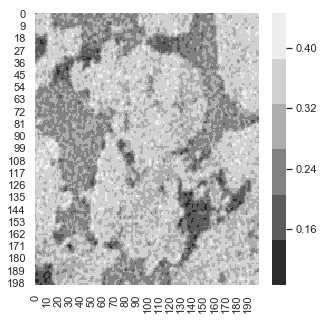

In [16]:
print(train_x.shape)

sns.set(rc={"figure.figsize": (5, 5)})
# abc = sns.choose_colorbrewer_palette("sequential")
abc = sns.color_palette("Greys_r")
ax = sns.heatmap(train_x[5,:,:,0],cmap=abc)

(300, 200, 200, 1)


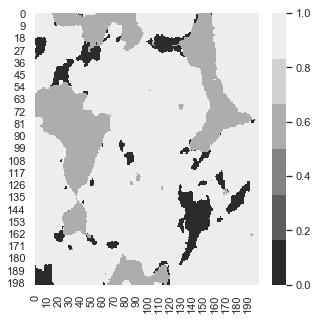

In [15]:
print(train_y.shape)

sns.set(rc={"figure.figsize": (5, 5)})
# abc = sns.choose_colorbrewer_palette("sequential")
abc = sns.color_palette("Greys_r")
ax = sns.heatmap(train_y[5,:,:,0],cmap=abc)

In [ ]:
print(train_z.shape)

# sns.set(rc={"figure.figsize": (5, 5)})
# # abc = sns.choose_colorbrewer_palette("sequential")
# abc = sns.color_palette("Greys_r")
# ax = sns.heatmap(train_z[:,:],cmap=abc)
plt.figure(1, figsize=(30, 5))
plt.plot(train_z[:, 0])

In [ ]:
print(pred_x.shape)

sns.set(rc={"figure.figsize": (5, 5)})
# abc = sns.choose_colorbrewer_palette("sequential")
abc = sns.color_palette("Greys_r")
ax = sns.heatmap(pred_x[2,:,:,0],cmap=abc)

In [ ]:
print(pred_y.shape)

sns.set(rc={"figure.figsize": (5, 5)})
# abc = sns.choose_colorbrewer_palette("sequential")
abc = sns.color_palette("Greys_r")
ax = sns.heatmap(pred_y[2,:,:,0],cmap=abc)

In [ ]:
print(pred_z.shape)

# sns.set(rc={"figure.figsize": (5, 5)})
# # abc = sns.choose_colorbrewer_palette("sequential")
# abc = sns.color_palette("Greys_r")
# ax = sns.heatmap(pred_z[:,:],cmap=abc)
plt.figure(1, figsize=(30, 5))
plt.plot(pred_z[:, 0])

In [8]:
tf_x = tf.placeholder(dtype=tf.float32,shape=(None, 200, 200, 4))
tf_y = tf.placeholder(dtype=tf.float32,shape=(None, 200, 200, 1))
tf_z = tf.placeholder(dtype=tf.float32,shape=(None, 7))
is_t = tf.placeholder(dtype=tf.bool,)

In [9]:
##定义模型
def MHNN_model():    
  
    main_input = Input(shape = (200,200,4), name='main_input')
    
    conv1 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(main_input)
    conv1 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv1)
    conv1 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    BN1   = BatchNormalization()(pool1)
    
    conv2 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(BN1)
    conv2 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv2)
    conv2 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    BN2   = BatchNormalization()(pool2)
    
    conv3 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(BN2)
    conv3 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv3)
    conv3 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv3)
    BN3   = BatchNormalization()(conv3)
    
    up1   = UpSampling2D(size = (2,2))(BN3)
    up1   = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(up1)
    
    merge1 = concatenate([conv2,up1], axis = 3)
    
    conv4 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(merge1)
    conv4 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv4)
    conv4 = Conv2D(filters=64, strides=1, kernel_size=3,activation='relu', padding='same')(conv4)
    
    up2   = UpSampling2D(size = (2,2))(conv4)
    up2   = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(up2)
    
    conv5 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(up2)
    conv5 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv5)
    conv5 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv5)
    conv5 = Conv2D(filters=4, strides=1, kernel_size=3,activation='relu', padding='same')(conv5)
    
    output1 = Conv2D(filters=1, strides=1, kernel_size=3, activation = 'sigmoid', padding = 'same')(conv5)
    
    output1_ = tf.reshape(output1, [-1, conv5.shape[1]*conv5.shape[2]])
    tf_y_    = tf.reshape(tf_y, [-1, conv5.shape[1]*conv5.shape[2]])

    
#     tf_x       = Conv2D(filters=4, strides=1, kernel_size=3,activation='relu', padding='same')(tf_x_input)
    tf_x   = Input(shape = (200,200,4))
    merge2 = concatenate([tf_x,output1], axis = 3)
#     merge2 = Lambda(lambda x: concatenate([tf_x,output1], axis = 3))
    
    conv6 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(merge2)
    conv6 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv6)
    conv6 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv6)
    pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
    BN6   = BatchNormalization()(pool6)
    
    merge3 = concatenate([pool6, pool1, conv4], 3) # [pool5, pool1, conv4]
    
    conv7 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(merge3)
    conv7 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv7)
    conv7 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv7)
    pool7 = MaxPooling2D(pool_size=(2, 2))(conv7)
    
    merge4 = concatenate([pool7, pool2, conv3], 3)
    
    conv8 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(merge4)
    conv8 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv8)
    conv8 = Conv2D(filters=16, strides=1, kernel_size=3,activation='relu', padding='same')(conv8)
    pool8 = MaxPooling2D(pool_size=(2, 2))(conv8)
    
    
#     dense8 = Lambda(lambda x: tf.reshape(pool8, [-1, 25*25*16]))
#     input3 = Input()

    
#     dense8 = Reshape((-1,25*25*16))(pool8)
    
    dense8 = Dense(2048, activation='relu')(pool8)
    BN8    = BatchNormalization()(dense8)
    
    dense9 = Dense(64, activation='relu')(BN8)
    BN9    = BatchNormalization()(dense9)
    
#     output2 = Dense(7)(BN9)
    output2 = Reshape((200,200,1))(BN9)
    model = Model(inputs=[main_input,tf_x], outputs=[output2])
    
    
    
#     def MHNN_loss_function(y_true, y_pred):
        
#         c = BinaryCrossentropy(tf_y_, output1_)
#         r = mse(output2, tf_z)
#         vc = tf.cast(c,dtype=tf.float32)
#         vr = tf.cast(a,dtype=tf.float32)
        
#         loss_cr = vr * 0.1 + vc * 0.9 
#         return loss_cr
        
        
    
    
    
    model.compile(loss='mse', metrics=['accuracy'], optimizer='Adam')
    return model

In [12]:
model = MHNN_model()
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 200, 200, 4)  0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 200, 200, 16) 592         main_input[0][0]                 
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 200, 200, 16) 2320        conv2d_29[0][0]                  
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 200, 200, 16) 2320        conv2d_30[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [13]:
model.fit([train_x,train_x], 
          train_y, 
          epochs=3, 
          batch_size=10, 
          shuffle=False, 
          )

Epoch 1/3


AbortedError: Operation received an exception:Status: 5, message: could not create a view primitive descriptor, in file tensorflow/core/kernels/mkl_slice_op.cc:433
	 [[{{node training_1/Adam/gradients/concatenate_6/concat_grad/Slice_1}}]]